In [ ]:
#pip install librosa
#!pip install kaggle

# Baixar dataset RAVDESS:
#!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio -p /~

# Descompactar os arquivos
#!unzip -q /~ravdess_data/ravdess-emotional-speech-audio.zip -d /~


# 🔊 Working with Audio in Python

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt 
import seaborn as sns

from glob import glob

import librosa 
import librosa.display 
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

## 🔊 Important terms to know for Audio in Digital Form: 


## Frequency (Hz):

- Frequency describes the differences of wave lengths.
- We interperate frequency has high and low pitches.

![![image.png]()](attachment:image.png)
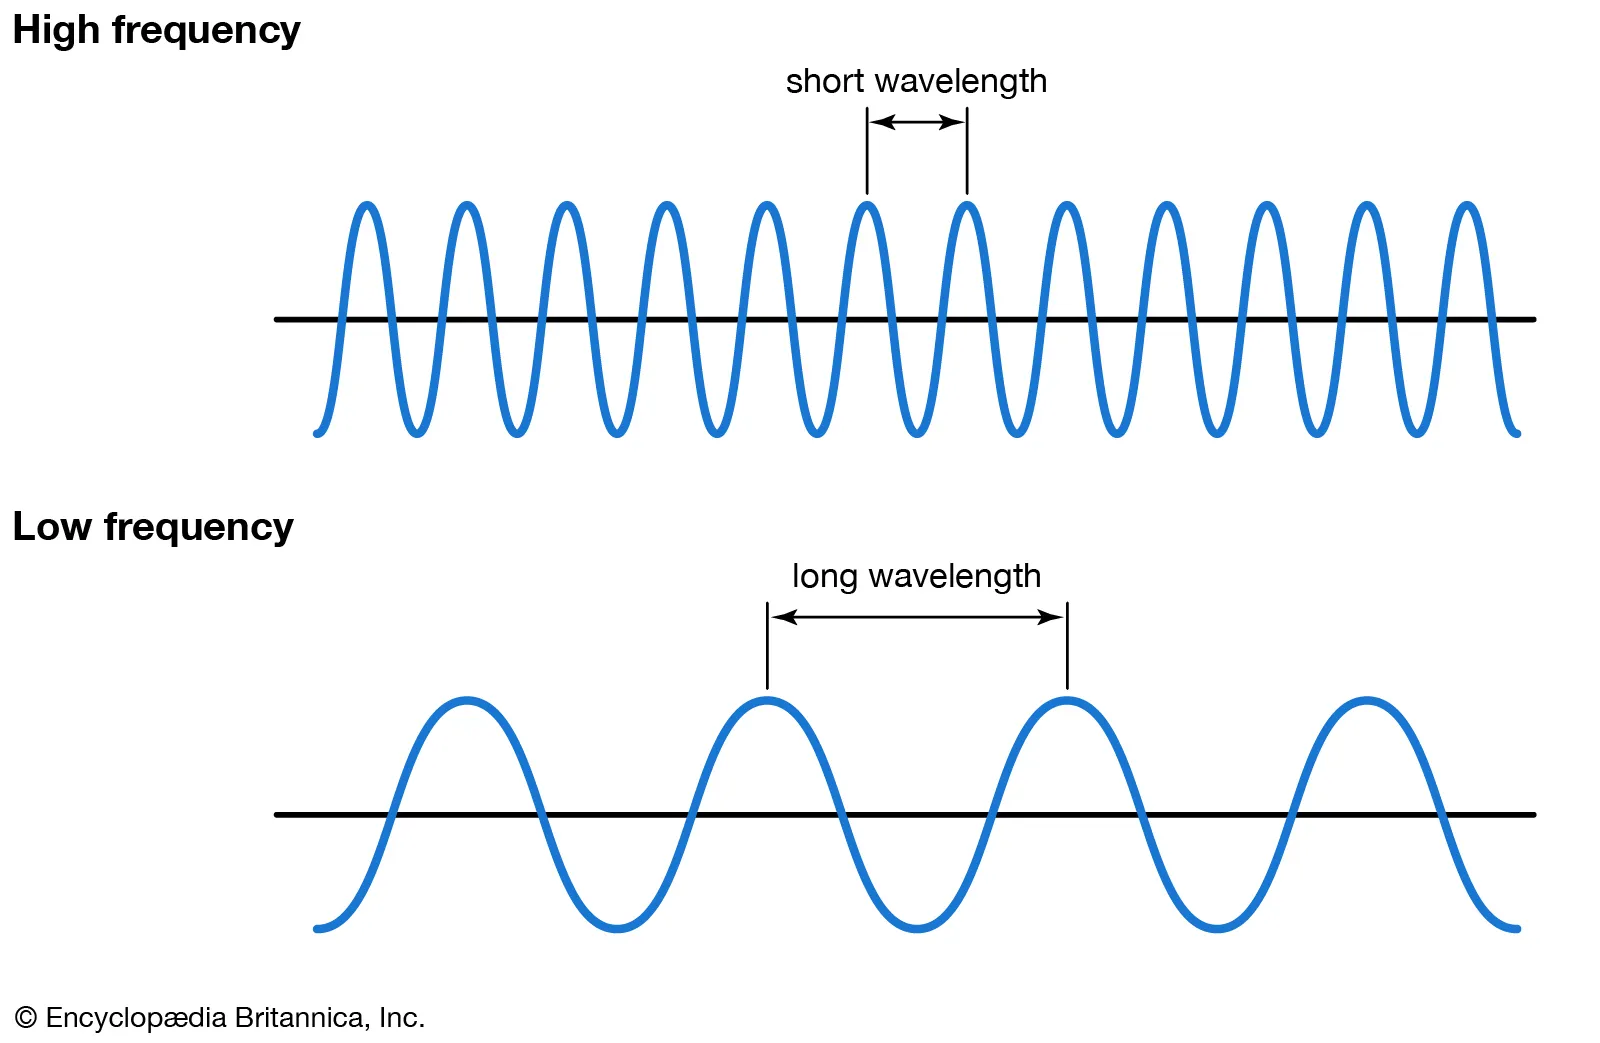

## Intensity (db / power):

- Intensity describes the amplitude (height) of the wave.



## Sample :
- Sample rate is specific to how the computer reads in the audio file.

- Think of it as the "resolution" of the audio.

## Reading in Audio Files
- There are many types of audio files: mp3, wav, m4a, flac, ogg

# 🔊 Reading the Audio Files:

In [18]:
audio_files = glob.glob('/home/stevan/ravdess_data/*/*.wav')

print(f"Arquivos encontrados: {len(audio_files)}")
print("Exemplo:", audio_files[0])


Arquivos encontrados: 1440
Exemplo: /home/stevan/ravdess_data/Actor_05/03-01-02-02-01-01-05.wav


In [20]:
# Play audio file
ipd.Audio(audio_files[0])

In [25]:
#from playsound import playsound
#playsound(audio_files[0])

In [26]:
y, sr = librosa.load(audio_files[0])
# y -> Raw data from audio file
# sr -> Sample rate from the audio (int)

In [36]:
print(f'\nShape of y: {y.shape}')
print(f'\nsr = {sr}')
print(f'\ny = {y[:10]}')



Shape of y: (104475,)

sr = 22050

y = [-2.2636309e-06  4.0983696e-06  1.1463422e-05  7.8415314e-07
 -3.0420176e-06  9.3493272e-06  8.0738955e-06 -1.5385747e-06
 -5.5311716e-08  9.9015199e-07]


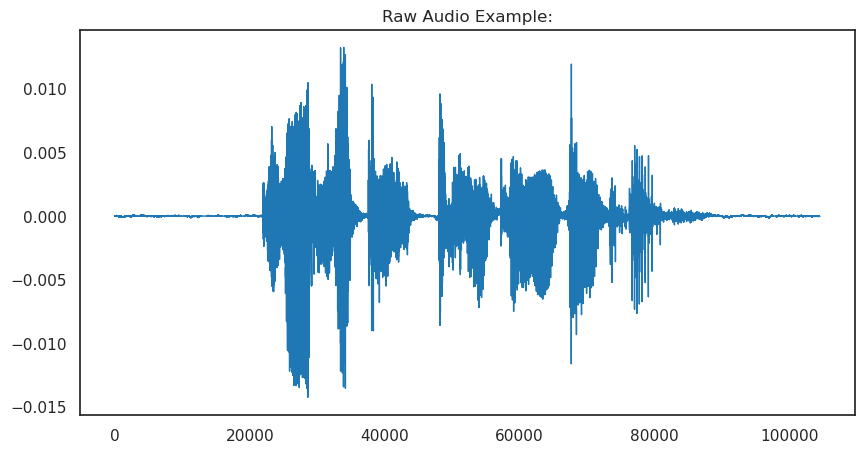

In [45]:
pd.Series(y).plot(figsize=(10,5), 
                  lw = 1, 
                  title= 'Raw Audio Example:', 
                  color = color_pal[0]) 
plt.show()

In [54]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)

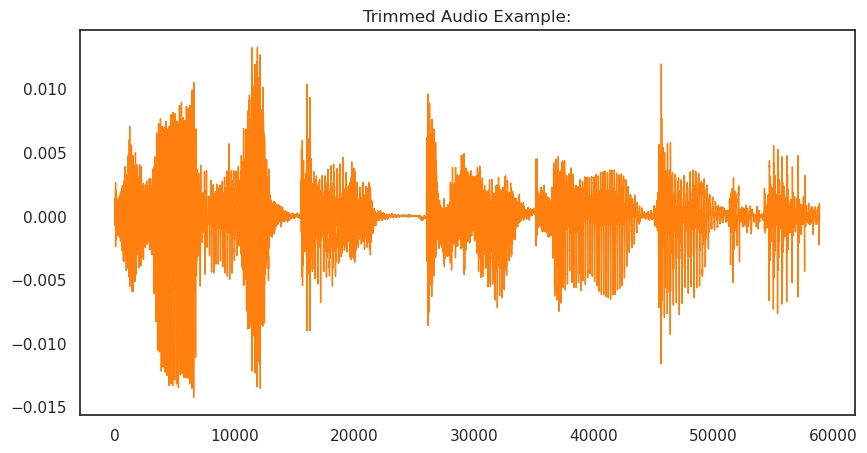

In [55]:
pd.Series(y_trimmed).plot(figsize=(10,5), 
                  lw = 1, 
                  title= 'Trimmed Audio Example:', 
                  color = color_pal[1]) 
plt.show()

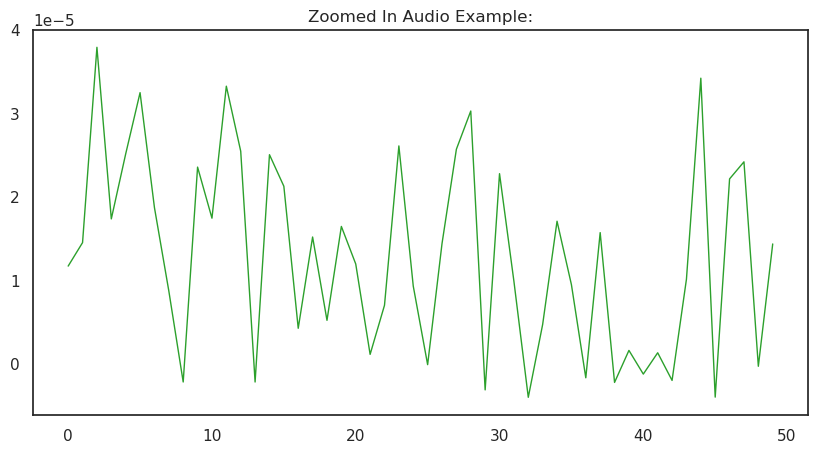

In [61]:
pd.Series(y[3000:3050]).plot(figsize=(10,5), 
                  lw = 1, 
                  title= 'Zoomed In Audio Example:', 
                  color = color_pal[2]) 
plt.show()

# Spectogram

In [64]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)
S_db.shape

(1025, 205)

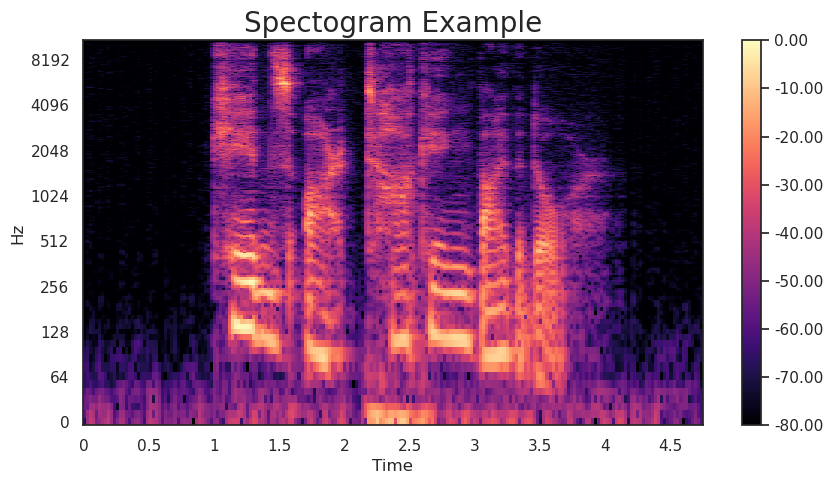

In [70]:
# Plot the transformed audio data:
fig, ax = plt.subplots(figsize = (10, 5))
img = librosa.display.specshow(S_db,
                               x_axis = 'time',
                               y_axis = 'log',
                               ax = ax)

ax.set_title('Spectogram Example', fontsize = 20)
fig.colorbar(img, ax=ax, format= f'%0.2f')

plt.show()

# Mel Spectogram

In [71]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

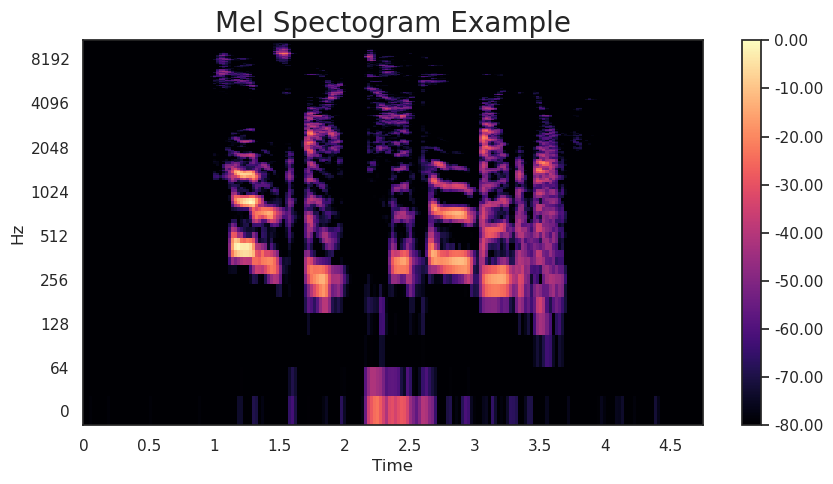

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()